## Starting Polynormal Regression!
21/12/07 == 00/09/16

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION'])

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,11.8,24,271
1063,3.2,6,X,13.2,9.5,11.5,25,264
1064,3.0,6,X,13.4,9.8,11.8,24,271
1065,3.2,6,X,12.9,9.3,11.3,25,260


In [21]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [22]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


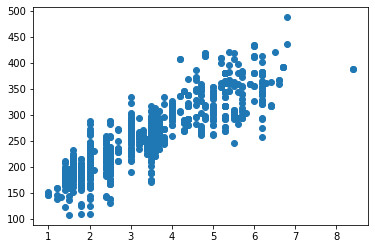

In [25]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE']], cdf[['CO2EMISSIONS']], test_size = 0.2)

X_test


,ENGINESIZE
10,2.4
739,2.1
190,3.6
580,2.4
530,3.7
...,...
943,2.0
717,2.5
824,1.2
422,2.0


In [103]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)

X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)


poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(X_train)
train_X_poly

X_test

array([[3.5],
       [5.4],
       [3.5],
       [2. ],
       [5. ],
       [2.4],
       [5. ],
       [2.5],
       [2. ],
       [2.4],
       [3. ],
       [1.4],
       [3.6],
       [6.2],
       [2. ],
       [2. ],
       [2. ],
       [5. ],
       [1.6],
       [5.3],
       [5. ],
       [4.2],
       [2.4],
       [2.5],
       [4. ],
       [1.4],
       [6.6],
       [2.5],
       [2. ],
       [2. ],
       [2. ],
       [1.4],
       [2. ],
       [3. ],
       [2.4],
       [2. ],
       [6. ],
       [3.6],
       [3.6],
       [3. ],
       [2. ],
       [4.7],
       [3.5],
       [3.6],
       [3.5],
       [5.3],
       [4.4],
       [1.4],
       [6.3],
       [2.4],
       [5.3],
       [1.5],
       [2. ],
       [3. ],
       [3. ],
       [6.2],
       [3. ],
       [3. ],
       [1.6],
       [5.7],
       [2. ],
       [3.5],
       [2. ],
       [3.6],
       [2.4],
       [6.2],
       [2. ],
       [2. ],
       [6.2],
       [6.2],
       [4.4],
      

In [96]:
from sklearn import linear_model

model = linear_model.LinearRegression()
train_y_ = model.fit(train_X_poly, y_train)


In [97]:
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[ 0.         50.45241183 -1.50359311]]
Intercept:  [106.85480091]


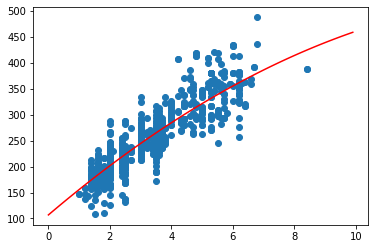

In [98]:
plt.scatter(X_train, y_train)
XX = np.arange(0.0, 10.0, 0.1)
yy = (model.intercept_[0]) + (model.coef_[0][1] * XX) + (model.coef_[0][2] * (XX ** 2))

plt.plot(XX, yy, '-r' )

In [120]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X_test)
test_y_ = model.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )



Mean absolute error: 23.50
Residual sum of squares (MSE): 986.50
R2-score: 0.79


S02E13 Completed :)